In [20]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

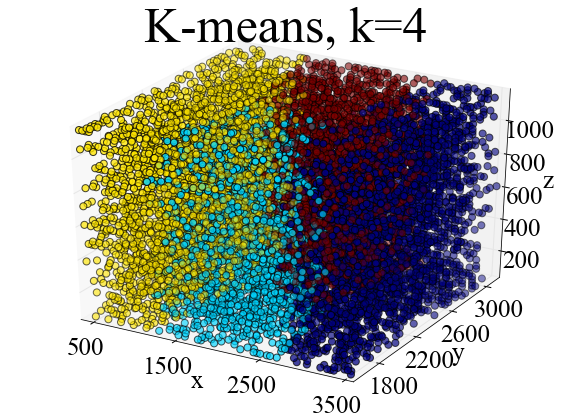

In [22]:
import sklearn.cluster as cluster
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['font.size'] = 25
mpl.rc('font',family='Times New Roman')

def graph_cluster(xyz_only, clusters, centers, k):
    # randomly sample
    samples = 10000
    perm = np.random.permutation(xrange(1, len(xyz_only[:])))
    xyz_only = xyz_only[perm[:samples]]
    clusters = clusters[perm[:samples]]

    # get range for graphing
    mins = [np.amin(xyz_only[:, i]) for i in xrange(3)]
    maxs = [np.amax(xyz_only[:, i]) for i in xrange(3)]

    # following code adopted from
    # https://www.getdatajoy.com/examples/python-plots/3d-scatter-plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')

    ax.set_title('K-means, k='+str(k),size = 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(mins[0], maxs[0])
    ax.set_ylim(mins[1], maxs[1])
    ax.set_zlim(mins[2], maxs[2])

    ax.view_init()
    ax.dist = 10  # distance

    ax.scatter(
               xyz_only[:, 0], xyz_only[:, 1], xyz_only[:, 2],  # data
               c=clusters,  # marker colour
               marker='o',  # marker shape
               s=50  # marker size
    )

    #plt.show()
    
n_clusters = 4
kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=1)
clusters = kmeans.fit_predict(cleaned[:,[0,1,2]])
centers = kmeans.cluster_centers_
graph_cluster(cleaned[:,[0,1,2]], clusters, centers, n_clusters)
plt.xticks([500,1500,2500,3500])
plt.yticks([1800,2200,2600,3000])
plt.savefig('Fig13a.pdf', format='pdf', dpi=1000)
plt.show()

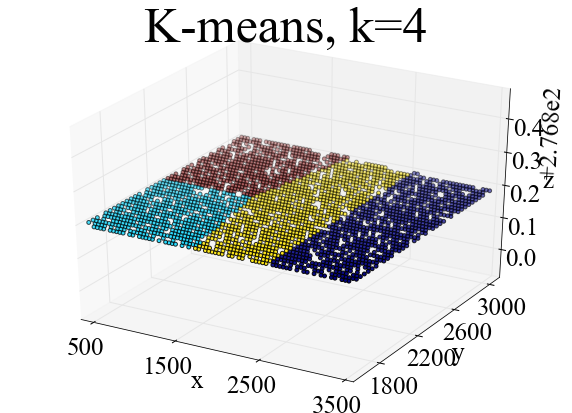

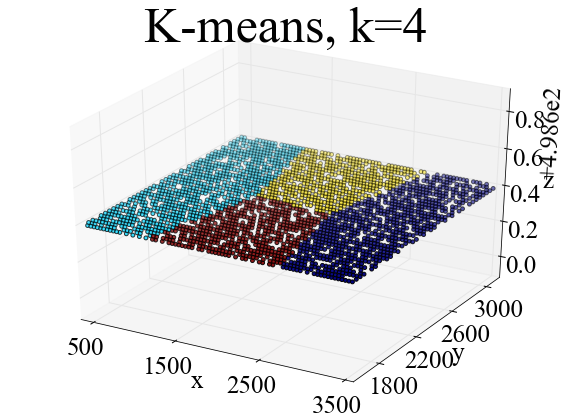

In [23]:
z_layer = [0] * 3
i = 0
import sklearn.cluster as cluster

for d in (222 + 55,444 + 55):
    z_layer = cleaned[cleaned[:,2] == d]
    xyz_only = z_layer[:,[0,1,2]]
    #print xyz_only.shape
    def graph_cluster(xyz_only, clusters, centers, k):
        # randomly sample
        samples = 2500
        perm = np.random.permutation(xrange(1, len(xyz_only[:])))
        xyz_only = xyz_only[perm[:samples]]
        clusters = clusters[perm[:samples]]

        # get range for graphing
        mins = [np.amin(xyz_only[:, i]) for i in xrange(3)]
        maxs = [np.amax(xyz_only[:, i]) for i in xrange(3)]

        # following code adopted from
        # https://www.getdatajoy.com/examples/python-plots/3d-scatter-plot
        fig = plt.figure(figsize=(10, 7))
        ax = fig.gca(projection='3d')

        ax.set_title('K-means, k='+str(k),size = 50)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.set_xlim(mins[0], maxs[0])
        ax.set_ylim(mins[1], maxs[1])
        ax.set_zlim(mins[2], maxs[2])

        ax.view_init()
        ax.dist = 10  # distance

        ax.scatter(
                   xyz_only[:, 0], xyz_only[:, 1], xyz_only[:, 2],  # data
                   c=clusters,  # marker colour
                   marker='o',  # marker shape
                   s=15  # marker size
        )

        #plt.show()

    n_clusters = 4
    kmeans_algo = cluster.KMeans(n_clusters=n_clusters)
    clusters = kmeans_algo.fit_predict(xyz_only)
    centers = kmeans_algo.cluster_centers_
    #print centers
    graph_cluster(xyz_only, clusters, centers, n_clusters)
    plt.xticks([500,1500,2500,3500])
    plt.yticks([1800,2200,2600,3000])
    if d == 222+55:
        plt.savefig('Fig13c.pdf', format='pdf', dpi=1000)
        plt.show()
    if d == 444+55:
        plt.savefig('Fig13b.pdf', format='pdf', dpi=1000)
        plt.show()